# Assigment 1

### Students: Arthur Brazinskas and Riaan Zoetmulder

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image, display
import math
import random
from scipy.optimize import minimize
from scipy.stats import chi2
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10.0, 10.0)

# 0.2 Signal strength and distance

##a)

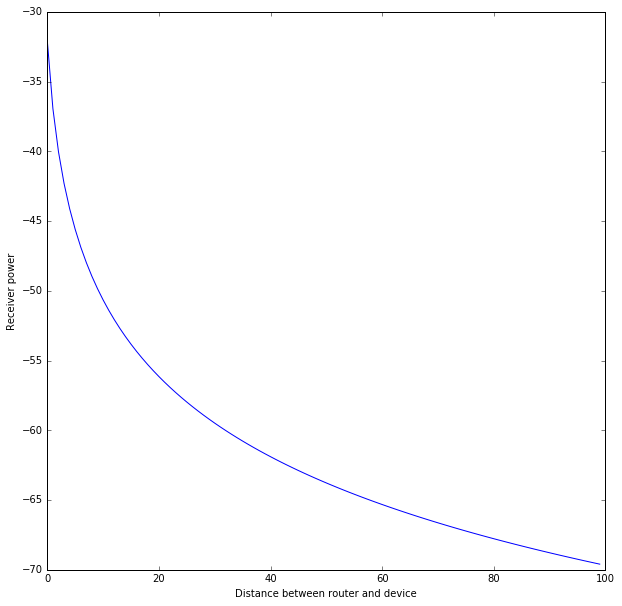

In [7]:
f = 2.4e9 # frequency(hz)
c = 299792458.0 # speed of light m/s
P_t = 0 # 

def P_r(r):
    return P_t + 20* np.log10( c/( 4*np.pi * f * r))
rs = np.linspace(0.4,30,100)
data = [P_r(r) for r in rs]
                              
fig = plt.figure()
plt.plot(range(len(data)), data,"-")
plt.xlabel("Distance between router and device")
plt.ylabel("Receiver power")
plt.show()


As we can see the receiver power decreases with distance increase. And thus we can conclude that the routers are more sensitive to the devices that are nearby. Matematically because Fris equation is a function that is decreasing with r. Intuitively, because devices such as phones poorly transmit wifi signals over large distances. 

##b-c) 

$P_r = P_t + 20 \cdot \log_{10}(\frac{c}{4 \cdot \pi \cdot f \cdot r})$

Move everything not in the log to the left:

$\frac{P_r - P_t}{20}= \log_{10}(\frac{c}{4 \cdot \pi \cdot f \cdot r})$

remove the log on the right side by raising to the power of 10:

$10^{\frac{P_r - P_t}{20}}= \frac{c}{4 \cdot \pi \cdot f \cdot r}$

to the power -1:

$\frac{1}{10^{\frac{P_r - P_t}{20}}}= \frac{4 \cdot \pi \cdot f \cdot r}{c}$

solve:

$r = \frac{c}{10^{\frac{P_r - P_t}{20}} \cdot 4 \cdot \pi \cdot f} $

In [7]:
# the distance between router and device as a function of P_r
def r(Pr, Pt):
    return 10**(-(Pr - Pt)/20.0) * c/(4*np.pi*f)

print 'distance difference between -30 dBm and of  -31 dBm receiver powers is %f' % abs(r(-30,0) - r(-31,0))
print 'distance difference between 30 dBm and of  29 dBm receiver powers is %f' % abs(r(30,0) - r(29,0))
print 'distance difference between -60 dBm and of  -61 dBm receiver powers is %f' % abs(r(-60,0) - r(-61,0))


distance difference between -30 dBm and of  -31 dBm receiver powers is 0.038355
distance difference between 30 dBm and of  29 dBm receiver powers is 0.000038
distance difference between -60 dBm and of  -61 dBm receiver powers is 1.212900


## d)

With lower receiver power it yields higher uncertainty. From mthematical perspective the distance is decreasing in receiver power $P_{r}$, and thus if decrease the receiver power, we will get large values and higher uncertaintly with saturation of $P_{r}$. 
Intuitively in also make sense, as if the receiver power is low, we can't be certain about the divice's position, and our estimations should be with larger errors, which are reflected in the numbers above. 

Another way to understand it, is that uncertainty becomes larger as the signal strength decreases. The mathematical explanation for this is because in the following formula for the radius:

$r = \frac{c}{10^{\frac{P_r - P_t}{20}} \cdot 4 \cdot \pi \cdot f} $

as P_r becomes smaller, the exponent becomes more negative, this causes the denominator to become smaller and the outcome to be much larger in total. Hence small perturbations will cause more of a change. 

# 0.3 Position reconstruction

## e)
It could happen due to router positions with respect to the device. For example, think about routers located in a circle around a device that is very close to some router. Regardless how you vary the $P_t$ there will be always a segment of intersection.
As mentioned previously, even if we discard the location of routers(in a circle) due to noise an other factors, some routers will have radius estimations such that they overlap not in a single point. In principle Venn diagram shown the idea where there is a large intersection segment, where device can be located. Then we have to use some sort of heuristic that will let us decide which point is the most likely intersection. Finally,  the noise in estimation can lead to a scenario where the circles that are drawn don't intersect at all. 

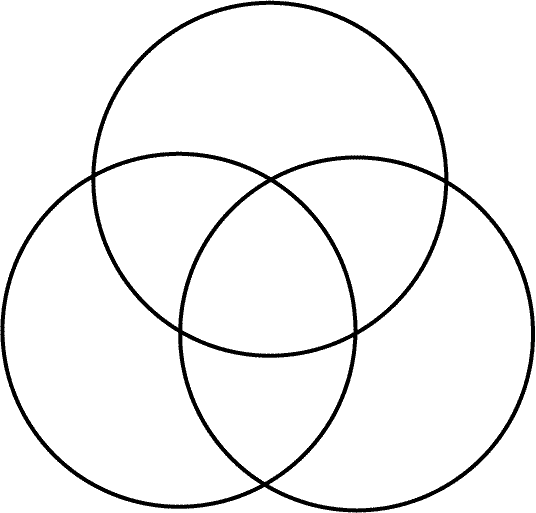

In [38]:
Image(filename='ven.png') 

## f) 

Friis Equation:
$P_r = P_t + 20 \cdot \log_{10}(\frac{c}{4 \cdot \pi \cdot f \cdot r}) $

We know that r is simply the euclidean distance between the phone and router in 3d space. r can thus be expressed as follows:

$r = \sqrt{((x-x_i)^2+(y-y_i)^2+(z-z_i)^2)}$

What we can do is we can separate the fraction inside the logarithm firstly, and separate the logs:

$P_r = P_t + 20 \cdot \log_{10}(\frac{c}{4 \cdot \pi \cdot f }\cdot \frac{1}{r})$

$P_r = P_t + 20 \cdot \log_{10}(\frac{c}{4 \cdot \pi \cdot f }) - 20 \log_{10}(r)$

Substitute for r:

$P_r = P_t + 20 \cdot \log_{10}(\frac{c}{4 \cdot \pi \cdot f }) - 20 \log_{10}(((x-x_i)^2+(y-y_i)^2+(z-z_i)^2)^{\frac{1}{2}})$

moving the exponent outside of the log:

$P_r = P_t + 20 \cdot \log_{10}(\frac{c}{4 \cdot \pi \cdot f }) - 10 \log_{10}((x-x_i)^2+(y-y_i)^2+(z-z_i)^2)$

keeping $(z-z_i)$ constant, this yields:

$P^i_r(x,y) = P_t + 20 \cdot \log_{10}(\frac{c}{4 \cdot \pi \cdot f }) - 10 \log_{10}((x-x_i)^2+(y-y_i)^2+Z^2)$




## g)

In [5]:
# initial data 
P_t = 0  
sigma = 1
def compute_r(x_dif,y_dif, Z=2):
    return math.sqrt( x_dif**2 + y_dif**2 + Z**2)
router = np.array([0,0])
device = np.array([20.0,0])
diff = router-device
my_r = compute_r(diff[0], diff[1])

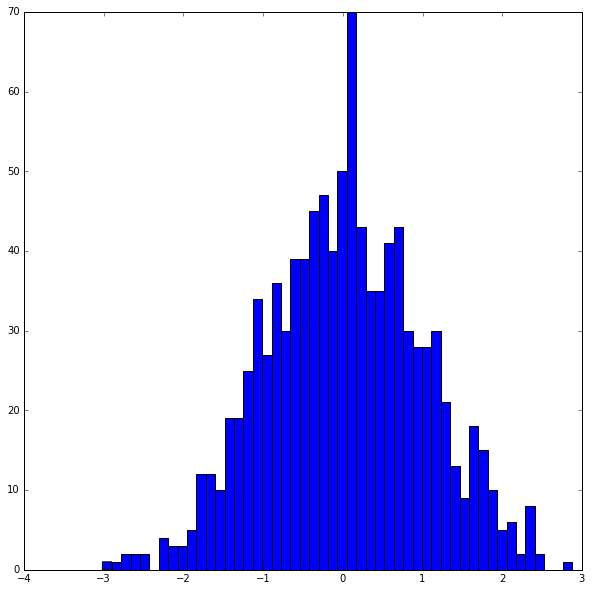

mean is 0.021622 and std is 0.978667


In [8]:
def simulate(true_sigma, noise_sigma, radius):
    residuals = []
    for i in range(1000):
        eps = np.random.normal(0,noise_sigma) # noise
        expec_P_r = P_r(radius)
        estim_P_r = expec_P_r + eps
        norm_res = (estim_P_r - expec_P_r)/true_sigma
        residuals.append(norm_res)
    return residuals
    
residuals = simulate(sigma, sigma, my_r)
nr_of_bins = 50
plt.hist(residuals, nr_of_bins)
plt.show()
my_mean = np.mean(residuals)
my_std = np.std(residuals)
print "mean is %f and std is %f"%(my_mean, my_std)

## h)

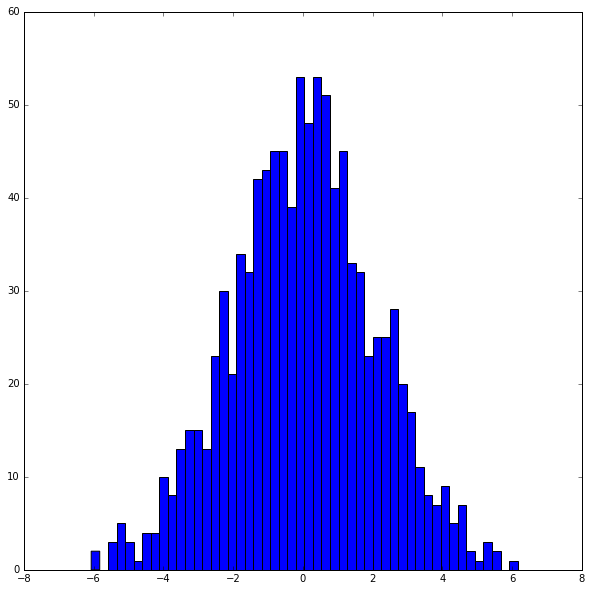

mean is 0.001563 and std is 2.049432


In [9]:
residuals = simulate(true_sigma=1, noise_sigma=2, radius=my_r)
nr_of_bins = 50
plt.hist(residuals, nr_of_bins)
plt.show()
my_mean = np.mean(residuals)
my_std = np.std(residuals)
print "mean is %f and std is %f"%(my_mean, my_std)

### Questions: What happens to the pull distribution if you underestimate the noise/fluctuations/measurement uncertainties?

If we understimate the noise we have a higher deviation of the uncertainty ( normalized residual). 

### Question: And what will happen if you overestimate?

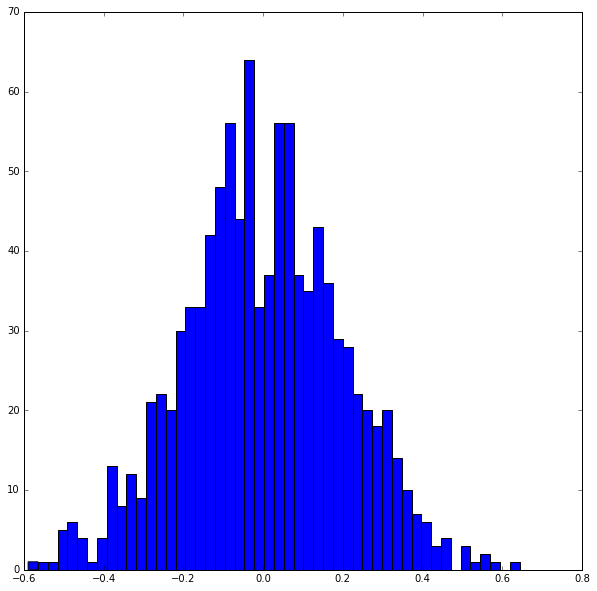

mean is 0.000154 and std is 0.198793


In [10]:
residuals = simulate(true_sigma=10, noise_sigma=2, radius=my_r)
nr_of_bins = 50
plt.hist(residuals, nr_of_bins)
plt.show()
my_mean = np.mean(residuals)
my_std = np.std(residuals)
print "mean is %f and std is %f"%(my_mean, my_std)

The standard deviation decreases if we overestimate the noise deviation, as well as the mean. 

## i)

In [11]:
# Receiver power with wrong constant
def P_r_wrong(r):
    return P_t + 25* np.log10( c/( 4*np.pi * f * r))

def simulate2(true_sigma, noise_sigma, radius):
    residuals = []
    for i in range(1000):
        eps = np.random.normal(0,noise_sigma) # noise
        expec_P_r = P_r(radius)
        estim_P_r = P_r_wrong(radius) + eps
        norm_res = (estim_P_r - expec_P_r)/true_sigma
        residuals.append(norm_res)
    return residuals

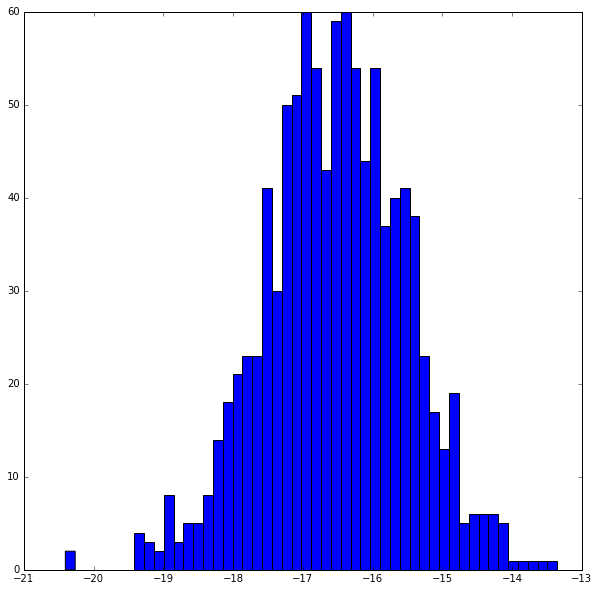

mean is -16.540278 and std is 1.012390


In [12]:
residuals = simulate2(true_sigma=1, noise_sigma=1, radius=my_r)
nr_of_bins = 50
plt.hist(residuals, nr_of_bins)
plt.show()
my_mean = np.mean(residuals)
my_std = np.std(residuals)
print "mean is %f and std is %f"%(my_mean, my_std)

### Question : What happens to the pull distribution if you have such a systematic error in your model?
We observe a shift in the distibutions, although there is no visible effect on the standard diviation. In general, if this happens you have a bias in your model and you may want to account for this by changing the model.

## j )

### Question: What do you want to see in your pull distribution to convince you that your model is correct and your uncertainties properly estimated?
Firstly in your pull distribution you want to see that you have a mean of around 0. This means that the average of your residuals is close to 0, otherwise this is indication of measurement/systematic error in your model and you would have to correct this somehow. Secondly, you want to see that the variance of around 1, otherwise you have error undercoverage ($\sigma < 1$) or overcoverage $\sigma >1$. 

# 0.4 Toy Monte Carlo

In [13]:
# data
routers_p = np.array([[0,0,3.0], [0,20.0,3.0], [20.0,20.0,3.0], [20.0,0,3.0]])
device_p = np.array([5.0,5.0,1.0])
sigmas = np.ones((1,4))

# to avoid confusion I use variables expect_P_r to indicate the true signal strength, and estim_P_r for what we estimate
# sometimes with noise. 

In [14]:
def chi_square(expect_P_r, estim_P_r, sigmas):
    return np.sum(( (expect_P_r - estim_P_r) / sigmas)**2)  
def compute_radiuses(diff_vec):
    return np.sqrt(np.sum((diff_vec)**2, axis=1) )

## k)

In [15]:
radiuses = compute_radiuses(routers_p - device_p)
# compute the true receiver signal (as we know his position)
expect_P_r = np.array([])
for radius in radiuses:
    expect_P_r = np.append(expect_P_r, P_r(radius))
true_chi_square = chi_square(expect_P_r, expect_P_r, sigmas)
print "true chi square is %f"% true_chi_square

true chi square is 0.000000


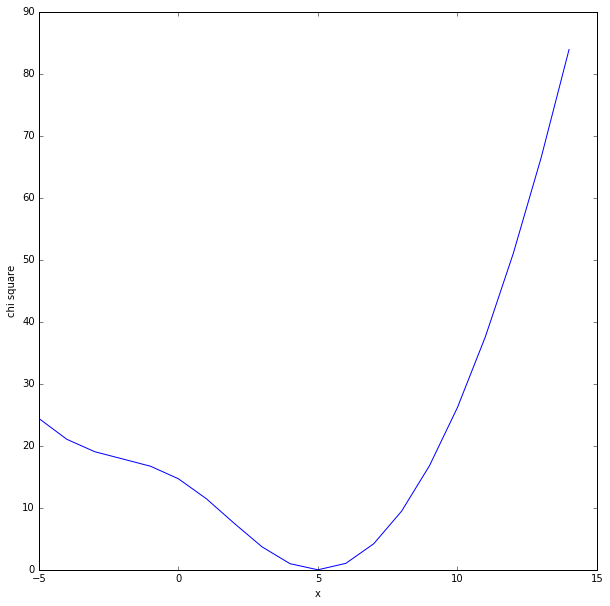

In [16]:
x_space = range(-5,15)
y = 5
h = 1
chi_squares=[]
for x in x_space:
    new_device_p = [x, y, h]
    radiuses = compute_radiuses(routers_p - new_device_p)
    estim_P_r = P_r(radiuses)
    chi_squares.append(chi_square(expect_P_r, estim_P_r, sigmas))
plt.plot(x_space, chi_squares)
plt.xlabel("x")
plt.ylabel("chi square")
plt.show()    

In [50]:
print "minimimum value is %f at x == %d " % (min(chi_squares), x_space[np.where(chi_squares==min(chi_squares))[0][0]])

minimimum value is 0.000000 at x == 5 


## l)

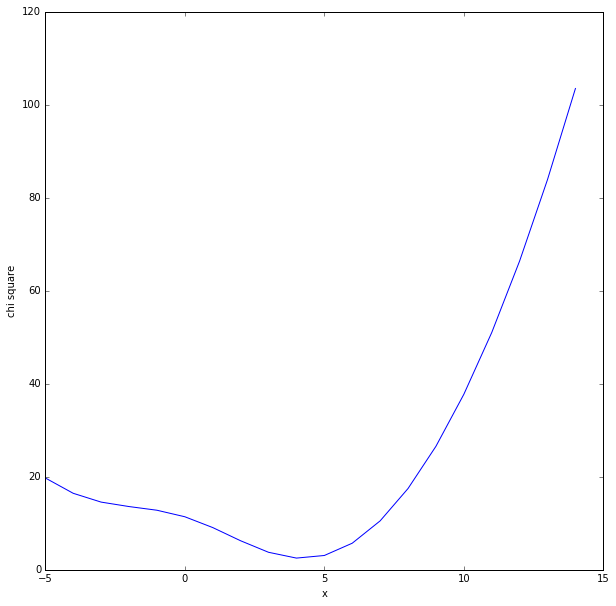

In [17]:
# adding some noise 
noise_sigma = 1
chi_squares = []
eps = np.random.normal(0, noise_sigma, (1,4)) # noise
# please note that in reality the noise sampling should be inside of the loop because it's more realistic
# for the demonstration purpose the noise is sampled once for every data point. 
for x in x_space:
    new_device_p = [x, y, h]
    radiuses = compute_radiuses(routers_p - new_device_p)
    estim_P_r = P_r(radiuses) + eps
    chi_squares.append(chi_square(expect_P_r, estim_P_r, sigmas))
plt.plot(x_space, chi_squares)
plt.xlabel("x")
plt.ylabel("chi square")
plt.show() 

In [18]:
print "Minimimum value is %f at x = %d " % (min(chi_squares), x_space[np.where(chi_squares==min(chi_squares))[0][0]])

Minimimum value is 2.518839 at x = 4 


we observe a shift from the initial global optimum point. 

### Question: what happens to the minimum if you repeat this procedure several times (with different independent random fluctuations)?

It has never been observed to be at the true position, and chi square has never been observed to be 0 once we added the noise. And if this is repeated several times, the minimum changes position.

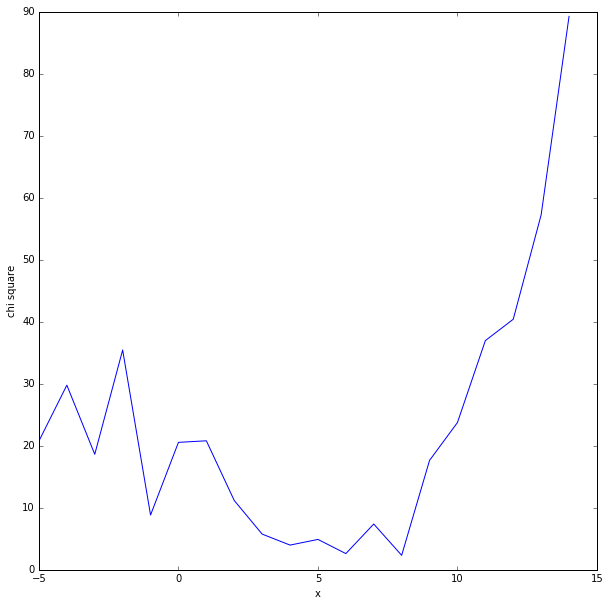

In [19]:
# alternative plot with noise in the loop
noise_sigma = 1
chi_squares = []
for x in x_space:
    new_device_p = [x, y, h]
    eps = np.random.normal(0, noise_sigma, (1,4))
    radiuses = compute_radiuses(routers_p - new_device_p)
    estim_P_r = P_r(radiuses) + eps
    chi_squares.append(chi_square(expect_P_r, estim_P_r, sigmas))
plt.plot(x_space, chi_squares)
plt.xlabel("x")
plt.ylabel("chi square")
plt.show() 

The noise generation in the loop produces more chaotic plot. This is done to illustrate that at different points, you may have different errors.

### m)

In [20]:
# this function is used to optimize w.r.t. to coordinates
def chi_square_mod(cord, expect_P_r, device_h=1):
    device_p = [cord[0], cord[1], device_h]
    radiuses = compute_radiuses(routers_p - device_p) #reausing previously defined vars  routers_p and device_p
    estim_P_r = np.array([])
    for radius in radiuses:
        estim_P_r=np.append(estim_P_r, P_r(radius))
    return np.sum(((estim_P_r - expect_P_r) / sigmas)**2)

def compute_radiuses(diff_vec):
    return np.sqrt(np.sum((diff_vec)**2, axis=1) )

res = minimize(chi_square_mod, x0=[0,0], args=(expect_P_r)) #  Please note that I'm using previously defined expect_P_r


print 'minimimum is achieved at x=%f and y=%f'% (res['x'][0], res['x'][1])

minimimum is achieved at x=5.000000 and y=5.000000


### n)

In [21]:
# at this stage I will reuse the expected P_rs from the previous task
def simulate_and_optimize(noise_sigma):
    records = []
    for i in range(1000):
        eps = np.random.normal(0, noise_sigma, (1,4)) # noise, one could 
        corr_expect_P_r =  np.array(expect_P_r, dtype="float32") + eps # corrupted with noise
        res = minimize(chi_square_mod, x0=[0,0], args=(corr_expect_P_r))
        records.append([res['fun'], res['x'][0], res['x'][1]])
    records = np.array(records)
    return records

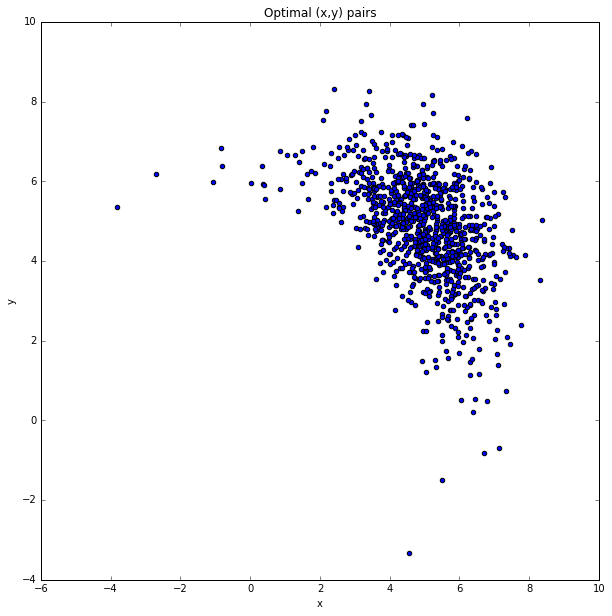

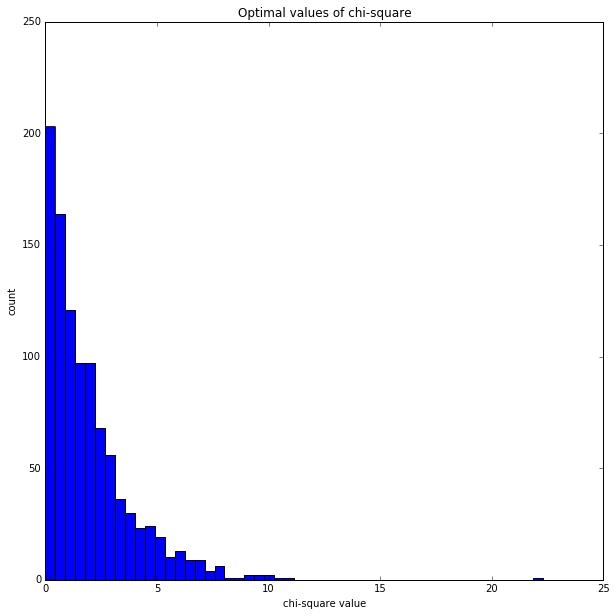

In [22]:
noise_sigma = 1
records = simulate_and_optimize(noise_sigma)

# plotting the optimal (x,y) pairs
plt.scatter(records[:,1], records[:,2])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Optimal (x,y) pairs')
plt.show()

# plotting histogram of the optimal values
nr_of_bins = 50
plt.hist(records[:,0], nr_of_bins)
plt.ylabel('count')
plt.xlabel('chi-square value')
plt.title('Optimal values of chi-square')
plt.show()

In [61]:
opt_means = np.mean(records, axis=0)
print 'The average position is (x=%f, y=%f) and the average chi-square minimum is %f' % (opt_means[1],opt_means[2], opt_means[0])

The average position is (x=4.938677, y=4.887478) and the average chi-square minimum is 2.063495


### o)
Yes, it does approximately matches $N_{dof}$ = 2.

###p)

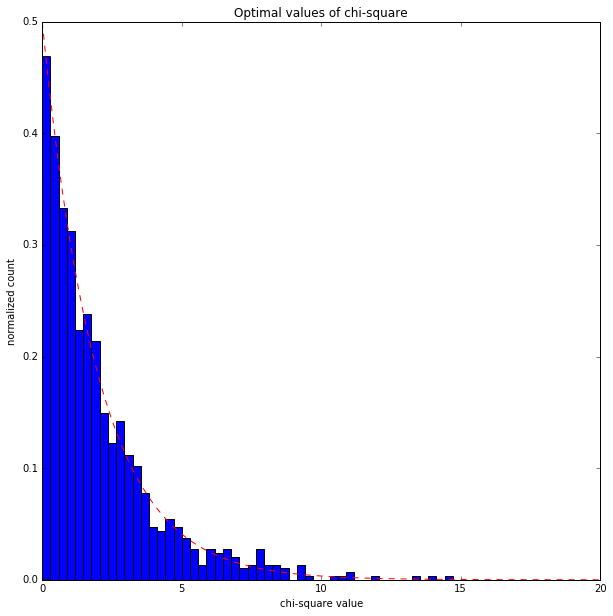

In [69]:

fig, ax = plt.subplots(1, 1)
nr_of_bins = 50
ax.hist(records[:,0], nr_of_bins, normed=1)

x = np.linspace(0,20,1000)
df = 2
ax.plot(x, chi2.pdf(x,df), 'r--', label='chi2 with 2 df')
    
plt.ylabel('normalized count')
plt.xlabel('chi-square value')
plt.title('Optimal values of chi-square')
plt.show()

Yes, it does approximately agrees with our normalized histogram. 

### q)

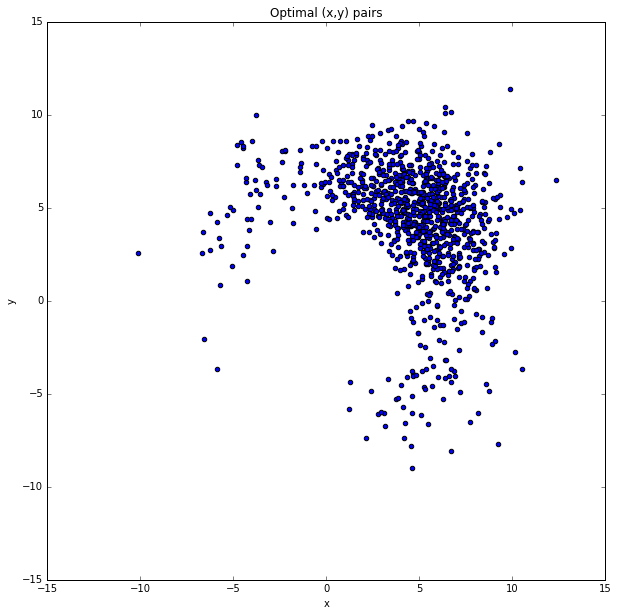

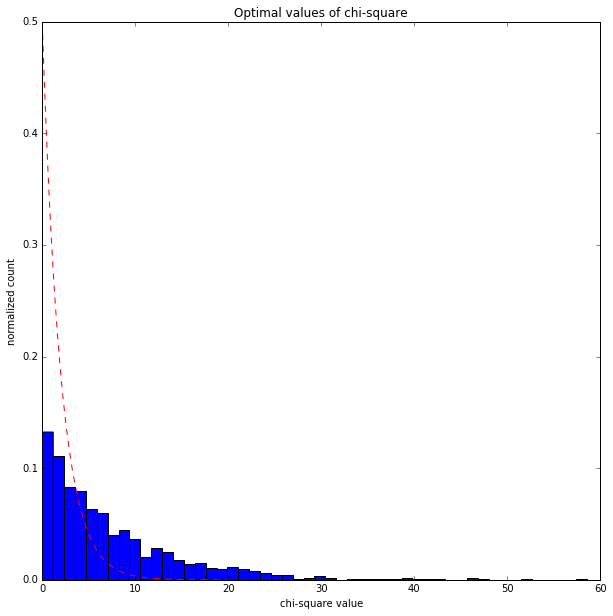

In [71]:
records = simulate_and_optimize(noise_sigma=2)

# plotting the optimal (x,y) pairs
plt.scatter(records[:,1], records[:,2])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Optimal (x,y) pairs')
plt.show()

# plotting histogram of the optimal values and the chi-square with 2 degrees of freedom
fig, ax = plt.subplots(1, 1)
nr_of_bins = 50
ax.hist(records[:,0], nr_of_bins, normed=1)

x = np.linspace(0,20,100)
df = 2
ax.plot(x, chi2.pdf(x,df), 'r--', label='chi2 with 2 df')
    
plt.ylabel('normalized count')
plt.xlabel('chi-square value')
plt.title('Optimal values of chi-square')
plt.show()

In [59]:
opt_means = np.mean(records, axis=0)
print 'The average position is (x=%f, y=%f) and the average chi-square is %f' % (opt_means[1],opt_means[2], opt_means[0])

The average position is (x=4.564909, y=4.270813) and the average chi-square is 7.258322


The cloud became more sparse and less concentrated around [5,5], and we observe more outliers. This is caused by wrong assumption about the noise, as we assumed it's 1, while it is 2. 

In addition, the histogram of $\chi^2$ values does not agree with the plot of $\chi^2_2$ pdf. The pdf has higher density (we use normalized counts) in the region where $\chi^2$ value is 0 and decreases rapadly starting from the value of 1-2. The reason we observe that is because of our wrong assumption about the noise, the minimizer could not produce that many values of $\chi^2$ that are close to 0. 

The formula for the chisquare is the following: $\chi^2 = \sum_i Z_i^2$.

Here $Z_i^2$ are the squared residuals from a standard normal gaussian. This assumption has been violated because of improper standardization, i.e. Z is no longer standard normal in our case, as such it behaves differently than a $\chi^2$ distribution.


### r)

The average value of $\chi^2$ should be close to 10. This can mean that we have a wrong assumption about the noise (for example, we assumed too small noise) or our model(in the context of the assignment that would be estimated P_r) does not describe the data well enough. 

# 0.5 Error on fit parameters

### s)

$\chi^2 = \sum\frac{(S_i - P^r_i(x,y))^2}{\sigma^2_i} $


Now we substitute :


$\chi^2 = \sum\frac{(S_i - (P^r_i(x_0,y_0)+ \alpha (x-x_0) + \beta (y-y_0)))^2}{\sigma^2_i} $ 


where, $\alpha_i = \frac{\partial P^r_i(x_0,y_0)}{\partial x}$ and $\beta_i = \frac{\partial P^r_i(x_0,y_0)}{\partial y}$


Now we expand this and collect terms, we obtain:


$\chi^2 = \sum_{i=1} \frac{((S_i - P^r_i(x_0,y_0))^2 + (\alpha_i(x - x_0)+\beta_i(y-y_0))^2 - 2(S_i - P^r_i(x_0,y_0))\alpha_i(x-x_0)-2(S_i - P^r_i(x_0,y_0))\beta_i(y-y_0)}{\sigma_i^2}$

##t)

Before approximating $\chi_N^2$ by expanding the square we get: 
$$ \chi^2_4(x,y) = \sum_{i=1}^4 \frac{S_i^2 - 2 S_iP_r^i(x,y) + P_r^i(x,y)^2}{\sigma_i^2} = \sum_{i=1}\frac{S_i^2}{\sigma_i^2} - 2 \sum_{i=1} \frac{S_i P_r^i(x,y)}{\sigma_i^2} + \sum_{i=1} \frac{P_r^i(x,y)^2}{\sigma_i^2}$$

Now by approximation we get:
$$ \chi_4 ^2 \approx \sum_{i=1}\frac{S_i^2}{\sigma_i^2} - 2 \sum_{i=1} \frac{S_i (P_r^i(x,y) + \alpha_i \Delta x + \beta_i \Delta y)}{\sigma_i^2} + \sum_{i=1} \frac{(P_r^i(x_0,y_0) + \alpha_i\Delta x + \beta_i \Delta y)^2}{\sigma_i^2} = \sum_{i=1} \frac{S_i^2}{\sigma_i^2} - 2 \sum_{i=1} \frac{S_i P_r^i(x,y) + S_i(\alpha_i \Delta x + \beta_i \Delta y)}{\sigma_i^2} + \sum_{i=1} \frac{P_r^i(x_0,y_0)^2  + 2 P_r^i(x_0,y_0)(\alpha_i \Delta x + \beta_i \Delta y) + (\alpha_i \Delta x)^2 + 2 \alpha_i \beta_i \Delta y \Delta x + (\beta \Delta y)^2 }{\sigma_i^2} 
$$ 

where  $\alpha_i = \frac{d P_r^i(x_0,y_0)}{dx}$, $\beta_i = \frac{d P_r^i(x_0,y_0)}{dy}$, $\Delta x = (x-x_0)$, $\Delta y = (y-y_0)$

Notice that in the 2nd and third components we have  $\alpha_i \Delta x + \beta_i \Delta y$ terms, which we'are going to group. 

$$ - 2 \sum_{i=1}^4 \frac{S_i(\alpha_i \Delta x + \beta_i \Delta y))}{\sigma_i^2} + 2 \sum_{i=1}^4 \frac{P_r^i(x_0,y_0) (\alpha_i \Delta x + \beta_i \Delta y)}{\sigma_i^2} = 2 \sum_{i=1} \frac{P_r^i(x_0,y_0) -S_i }{\sigma_i^2} \alpha_i \Delta x + 2 \sum_{i=1} \frac{P_r^i(x_0,y_0) - S_i}{\sigma_i^2} \beta_i \Delta y = 0$$
By looking to the partials of $\chi_N^2$ given in the assignment we conclude that the whole equation is equal to 0. 

$$X_4^2 \approx \sum_{i=1} \frac{S_i^2}{\sigma_i^2}  + \sum_{i=1} \frac{-2 S_i P_r^i(x_0,y_0) + P_r^i(x_0,y_0)^2 + (\alpha_i \Delta x + \beta_i \Delta y)^2}{\sigma_i^2} = \sum_{i=1} \frac{S_i^2 - 2 S_i P_r^i(x_0,y_0) + P_r^i(x_0,y_0)^2}{\sigma_i^2} + \sum_{i=1} \frac{(\alpha \Delta x + \beta_i \Delta y)^2}{\sigma_i^2} = 
\sum_{i=1} \frac{(S_i - P_r^i(x_0,y_0))^2}{\sigma_i^2} + \sum_{i=1} \frac{(\alpha_i \Delta x)^2 + 2 \alpha_i \beta_i \Delta x \Delta y + (\beta_i \Delta y)^2}{\sigma_i^2}$$

## u)

$$ \hat B =  \begin{bmatrix}
    \sum_{i=1} \frac{\alpha_i^2}{\sigma_i^2}  & \sum_{i=1} \frac{\alpha_i \beta_i}{\sigma_i^2}\\
    \sum_{i=1} \frac{\alpha_i \beta_i}{\sigma_i^2} & \sum_{i=1} \frac{\beta_i^2}{\sigma_i^2}
  \end{bmatrix}
$$

$$ A = \sum_{i=1} \frac{(S_i - P_r^i(x_0,y_0))^2}{\sigma_i^2} $$

### v)

In the following task I will assume that the matrix is positive definite. 
In order to solve the problem, one has to realize that A constant in u) does not depend on our choice of $\Delta x$ and $\Delta y$, and thus to raise $\chi^2$ by 1, we need to raise the second component by 1. Second, it's obvious that the problem is of the convex optimization type, where we have a linear objective and an quadratic inequality contraint. The reason why equality has been changed to inequality is because in convex optimization only affine equality constraints are allowed. However, it's not hard to see that the unit ellipse $\{c|  c^T \hat B c\ \leq 1 \}$ will have some $c$ that has maximum first component (or second) where $c^T \hat B c == 1$, i.e. it's the point on the boundary.

Convex optimization problem's formulation is presented below, where $\alpha$ = $[1 \; 0]^T$ or $[0 \; 1]^T$ if we want to find maximum $\Delta x$ or $\Delta y$ respectively, and $c = [\Delta x \; \Delta y]^T$ 
$$ \max c^T \alpha \\
\text{subject to: } c^T \hat B c <= 1$$

In principle, we could solve this problem by using any modern convex solver (e.g. cvx), but instead we will use pure calculus to derive the analytical solution. 

$$ L(c) = \alpha^T c - \lambda (c^T \hat B c - 1) \\ 
\frac{d L(c)}{dc} = \alpha - 2\lambda\hat B c = 0 \\
\frac{d L(c)}{d \lambda} = - (c^T \hat B c - 1) = 0$$



Where $\lambda$ is a Lagrange multiplier. And we asume that $\alpha$ is one-hot vector. 

$$ 2 \lambda \hat B c  = \alpha => c = \frac{ {\hat B}^{-1} \alpha }{2 \lambda} \\
\frac {1}{4 \lambda ^2} (\hat B \alpha)^T \hat B {\hat B}^{-1} \alpha + 1 = 0 => 4 \lambda^2 = \alpha^T \hat B^{-1} \alpha => \lambda = +- \frac{1}{2} \sqrt{\alpha^T \hat B^{-1} \alpha} \\
c = +- \frac{\hat B^{-1} \alpha} {\sqrt{\alpha^T \hat B^{-1} \alpha} }
$$

$c$ is a vector that contains $\Delta x$, $\Delta y$ corresponding to two critical points for a given $\alpha$ vector, which are shown on the figure below. Only thing we need to do is to select the components pair with a positive sign of the component of interest. 

concretely, if we are interested in max $\Delta x$, then our solution breaks down to:
    $$[\Delta x \; \Delta y]^T = +- \frac{[\hat B^{-1}_{11} \; \hat B^{-1}_{21}]^T}{\sqrt{\hat B_{11}^{-1}}}$$
    
 If we are interested in max $\Delta y$, then our solution breaks down to: 
 $$[\Delta x \; \Delta y]^T = +- \frac{[\hat B^{-1}_{22} \; \hat B^{-1}_{12}]^T}{\sqrt{\hat B_{22}^{-1}}}$$

Notice that we get for free a second element of the pair in both cases.  

Figure below shows the critical x points(and their corresponding ys) that are indicated by red circles for a generated positive definite matrix B. So in our case, we could select the pair of $\Delta x, \Delta y$ where $\Delta x$ is positive. 

Finally, we note that inverse of positive definite matrix is also positive definite, and positive definite matrices have positive diagonal elements. Therefore, in order to obtain the variance, one could simple take diagonal elements of the inverse matrix. 

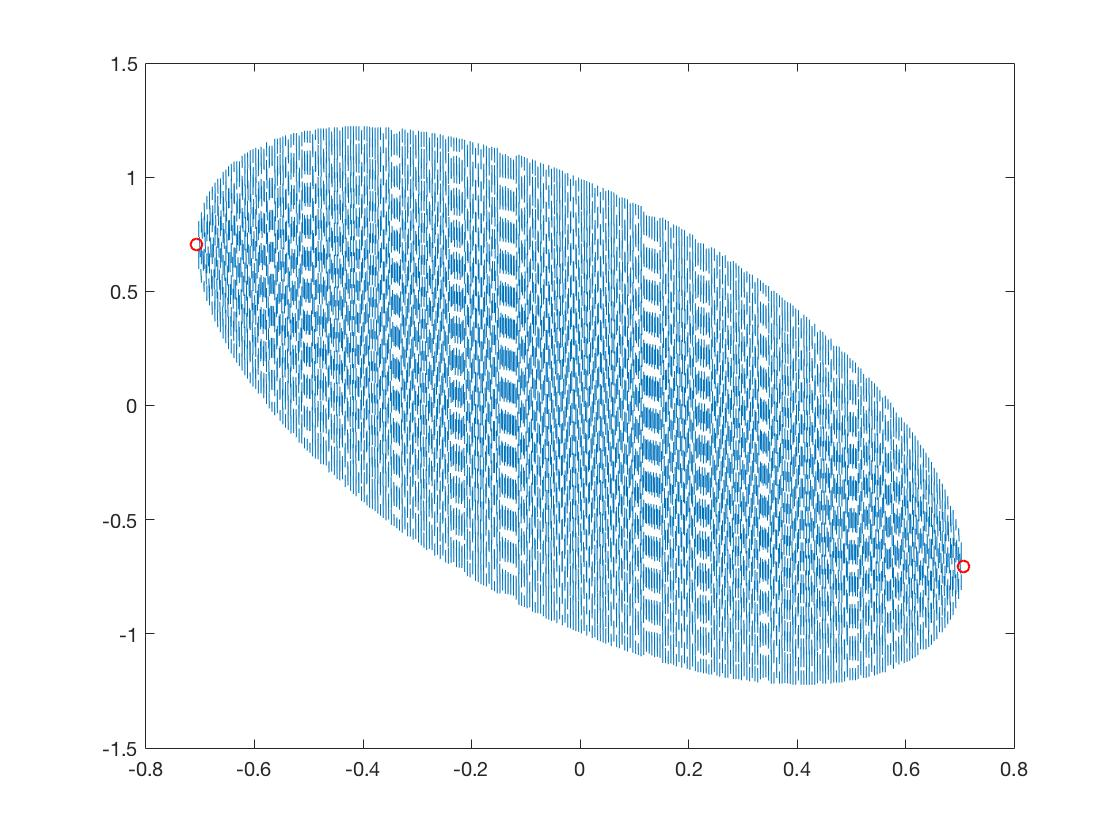

In [6]:
Image(filename='ellipse.jpg') 

Another way to solve the problem would be the following: 


$\Delta x^2 \sum \alpha_i + 2 \Delta x \Delta y \sum \alpha_i \beta_i + \Delta y^2 \sum \beta^2 -1 = 0 $

We can say the following:

a= $\sum \alpha_i^2$, b = $2 \Delta y \sum \alpha_i \beta_i$, c = $\Delta y^2 \sum \beta^2 -1 $ 

Determine the value for the discriminant:

D = $\sqrt{(2 \Delta y \sum \alpha_i \beta_i)^2 - 4\sum \alpha_i^2 (\Delta y^2 \sum \beta^2 - 1)}$

Simplify:

D = $2\sqrt{ \Delta y^2 (\sum \alpha_i \beta_i)^2 - \sum \alpha_i \Delta y^2 \sum \beta^2 +\sum \alpha_i^2 }$

D = $2\sqrt{ \Delta y^2 ((\sum \alpha_i \beta_i)^2 - \sum \alpha_i \sum \beta^2 )+ \sum \alpha_i^2 }$

Now we can solve for $\Delta y$:


$\Delta y^2 ((\sum \alpha_i \beta_i)^2 - \sum \alpha_i \sum \beta^2 )+ \sum \alpha_i^2  = 0$

$\Delta y^2  = \frac{\sum \alpha_i^2}{( \sum \alpha_i \sum \beta^2- (\sum \alpha_i \beta_i)^2 )} $

If we wish to solve for y we turn this procedure around and we get the following answer for the discriminant:

$\Delta x^2  = \frac{\sum \beta_i^2}{( \sum \alpha_i \sum \beta^2- (\sum \alpha_i \beta_i)^2 )}$

if we substitute these values into the for x and y into the discriminant we get 0. At these locations we thus find that there is only 1 optimal solution.

Now we can easily write down the optimal values for which the chi square increases by 1 for the $\Delta x$ and $\Delta y$ values.

These are:

$\Delta \chi^2 = -\frac{\sum \alpha_i \beta_i}{\sum \alpha_i^2}\Delta y$

$\Delta \chi^2 = -\frac{\sum \alpha_i \beta_i}{\sum \beta_i^2}\Delta x$

##w)

$$ \alpha_i = \frac{d P_r^i(x_0,y_0)}{dx} = \frac{-20 (x_0 - x_i)}{\hat r_i \ln 10 }$$
$$ \beta_i = \frac{d P_r^i(x_0,y_0)}{dy} = \frac{-20 (y_0 - y_i)}{\hat r_i \ln 10 }$$
Where $\hat r_i = (x_0 - x_i)^2 + (y_0 - y_i)^2 + Z^2$


In [23]:
noise_sigma = 1  
sigmas = np.ones((1,4))*1.0 # estimated sigmas 
routers_p = np.array([[0,0,3.0], [0,20.0,3.0], [20.0,20.0,3.0], [20.0,0,3.0]]) # routers positions
device_p = np.array([5.0,5.0,1.0]) # true device position
radiuses = compute_radiuses(device_p-routers_p)
# compute the true receiver signal (as we know his position)
expect_P_r = np.array([])
for radius in radiuses:
    expect_P_r = np.append(expect_P_r, P_r(radius))
eps = np.random.normal(0, noise_sigma, (1,4)) # noise

corr_expect_P_r =  np.array(expect_P_r, dtype="float32") + eps # corrupted with noise
res = minimize(chi_square_mod, x0=[0,0], args=(corr_expect_P_r)) 
# optimal points 
x_0 = res['x'][0]
y_0 = res['x'][1]
print "optimal x_0 is %f"% x_0
print "optimal y_0 is %f"% y_0

optimal x_0 is 5.526636
optimal y_0 is 4.309095


We note that 
$$ \hat B^{-1} = \begin{bmatrix}
    \hat B_{22} & - \hat B_{12} \\
    - \hat B_{21} & \hat B_{11}                    
  \end{bmatrix} 
  \frac{1}{(\hat B_{11} \hat B_{22} - \hat B_{12} \hat B_{21})}
$$ Which implies that the inverse diagonal elements depend on offset elemens, and thus we have to use all elements. 

In [24]:
def compute_B_hat(x_0,y_0, routers_p, sq_estim_radiuses, sigmas, gammas =1):
    constant = -20.0/np.log(10.0)
    alphas = (x_0 - routers_p[:,0])/sq_estim_radiuses
    betas = (y_0 - routers_p[:,1])/sq_estim_radiuses                                
    B11 = (constant**2) * np.sum((alphas/sigmas)**2)
    B22 = (constant**2) * np.sum((betas/sigmas)**2)
    B12 = (constant**2) * np.sum(alphas*betas/(sigmas)**2)
    return np.array([[B11, B12],[B12, B22]])

In [25]:
estim_device_p = np.array([x_0, y_0, 1.0])
estim_radiuses = compute_radiuses (routers_p - estim_device_p)
sq_estim_radiuses = estim_radiuses**2

B_hat = compute_B_hat(x_0,y_0, routers_p, sq_estim_radiuses, sigmas)
B_hat_inv = np.linalg.inv(B_hat)
# those computations follow from the formulas derived previously 
var_x = B_hat_inv[0,0]
var_y = B_hat_inv[1,1]


print "sd of x pos is %f"% var_x**0.5
print "sd of y pos is %f"% var_y**0.5


sd of x pos is 1.078310
sd of y pos is 1.291798


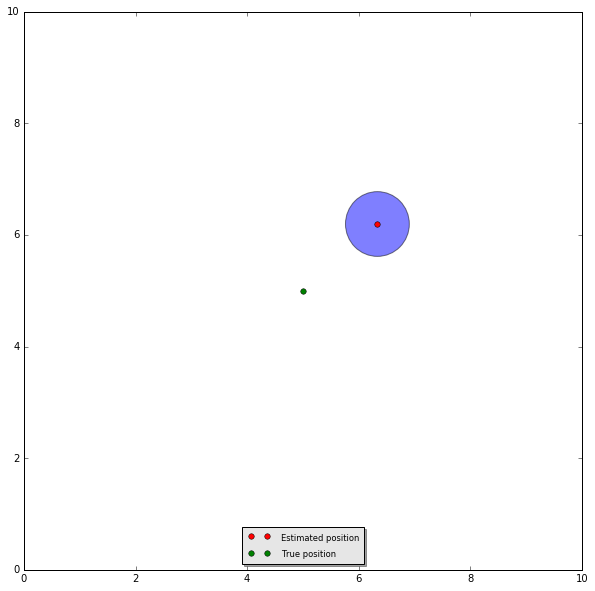

In [79]:
from matplotlib.patches import Ellipse
# plotting

fig = plt.figure(0)
ax = fig.add_subplot(111, aspect='equal')

# uncertainty ellipse
el = Ellipse(xy=[x_0, y_0], width=var_x**0.5, height=var_y**0.5)
ax.add_artist(el)
ax.plot(x_0,y_0,'or',label='Estimated position', markersize=5.5)
ax.plot(device_p[0],device_p[1],'og',label='True position', markersize=5.5)
# Now add the legend with some customizations.
legend = ax.legend(loc='lower center', shadow=True)

# The frame is matplotlib.patches.Rectangle instance surrounding the legend.
frame = legend.get_frame()
frame.set_facecolor('0.90')

# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('small')

for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width

el.set_alpha(0.5)
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
plt.show()


## y)

In [45]:
def simulate_and_optimize_return_residuals(N, noise_sigma, expect_P_r, radiuses, estim_noise_factor):
    # residuals
    x_res = [] 
    y_res = []
    for i in range(N):
        eps = np.random.normal(0, noise_sigma, (1,4)) # noise
        corr_expect_P_r =  np.array(expect_P_r, dtype="float32") + eps # corrupted with noise
        res = minimize(chi_square_mod, x0=[0,0], args=(corr_expect_P_r)) 
        # optimal points 
        x_0 = res['x'][0]
        y_0 = res['x'][1]
        
        # uncertainty
        estim_device_p = np.array([x_0, y_0, 1.0])
        estim_radiuses = compute_radiuses (routers_p - estim_device_p)  
        B_hat = compute_B_hat(x_0, y_0, routers_p, estim_radiuses**2, sigmas)
        B_hat_inv = np.linalg.inv(B_hat)
        x_vars = B_hat_inv[0,0]
        y_vars = B_hat_inv[1,1]
        # here we divide by the estimated uncertainties 
        x_res +=[(device_p[0] - x_0)/ (estim_noise_factor * (x_vars**0.5)) ]
        y_res +=[(device_p[1] - y_0)/ (estim_noise_factor * (y_vars**0.5))]
        
    return x_res, y_res

In [46]:
N = 1000
expect_P_r = np.array([])
for radius in radiuses:
    expect_P_r = np.append(expect_P_r, P_r(radius))
    
x_resid, y_resid = simulate_and_optimize_return_residuals(N, noise_sigma=1, estim_noise_factor=1, expect_P_r=expect_P_r, radiuses=radiuses)

In [47]:
def plot_x_y_residuals(x_resid, y_resid):
    # distr of x resid.     
    nr_of_bins = 50
    plt.hist(x_resid, nr_of_bins)
    plt.title("x residuals")
    plt.show()
    x_mean = np.mean(x_resid)
    x_std = np.std(x_resid)
    print "x residual mean is %f and std is %f"%(x_mean, x_std)
    # distr of y resid.     
    plt.hist(y_resid, nr_of_bins)
    plt.title("y residuals")
    plt.show()
    y_mean = np.mean(y_resid)
    y_std = np.std(y_resid)
    print "y residual mean is %f and std is %f"%(y_mean, y_std)


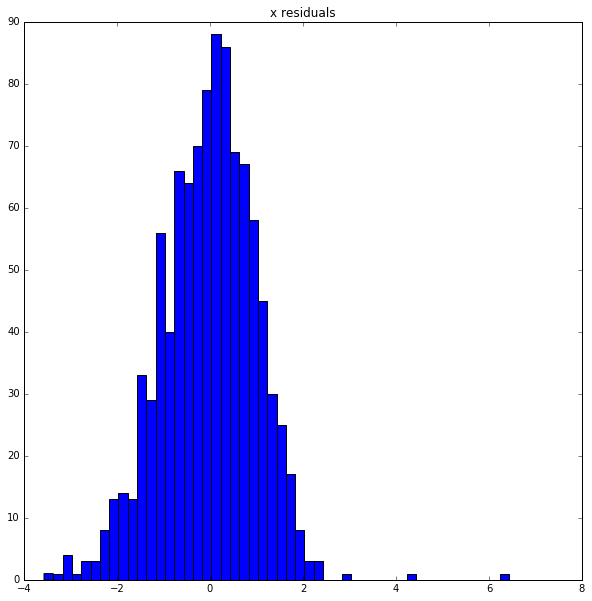

x residual mean is -0.028438 and std is 1.007133


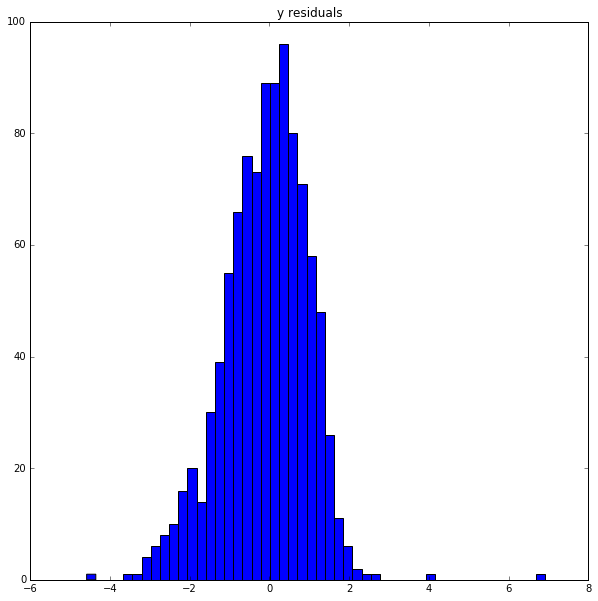

y residual mean is -0.101350 and std is 1.056341


In [48]:
plot_x_y_residuals(x_resid,y_resid)

The plots look close to what is expected. Due to error propogation( noise in estimation affects the optimized parameters) we get distributions slightly different from 0 mean and 1 standard deviation respectively. In addition, we observer a slighly asymmetric tails, and a presence of outliers, which could be explained by the stochastic nature of the noise generation. 

## z) 

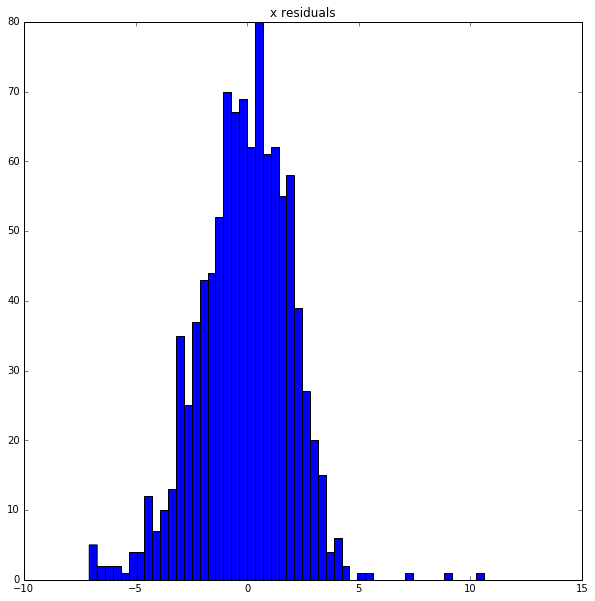

x residual mean is -0.131200 and std is 2.043129


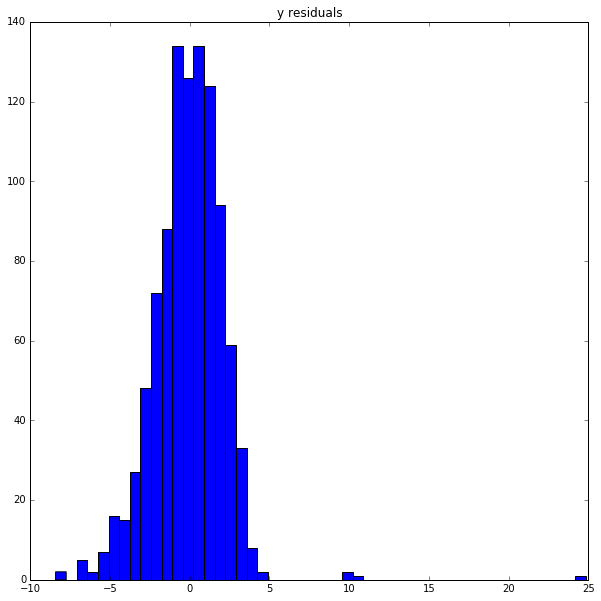

y residual mean is -0.091209 and std is 2.202965


In [50]:
# In this question estimated errors term is not defined, and thus it's assumed to be residuals.
N= 1000
x_resid, y_resid = simulate_and_optimize_return_residuals(N, noise_sigma=1, estim_noise_factor=0.5, expect_P_r=expect_P_r, radiuses=radiuses)
plot_x_y_residuals(x_resid,y_resid)

As we underestimated our noise, the distributions are much wider (higher std) than previously, and also we experience a bigger offset from the expected mean(which is 0). It can be explained by the error propogation, that the noise effects the  

Bonus question: in short it follows from the fact that the matrix $\hat B$ is positive definite, and thus it spans an ellipse, which can't be skewed. Principal axis of the ellipse are computed as $s_i= \lambda_i^{0.5} q_i$ ($\lambda_i $ non-zero eigen value and $q_i$ eigen vector), and they are orthogonal ( because eigen vectors of symmetric matrices are orthogonal). And thus it's impossible to obtain a skewed ellipse using ortogonal principal axis. In our case it's easy to see by drawing an ellipse with two orthogonal axis. 

# 0.6 Wifi tracking

In [2]:
# import convention for pandas
import pandas as pd
# read in your data
from matplotlib.patches import Ellipse
df = pd.read_csv('UvA-wifitracking-exercise-prepped-data.csv')
# show first 5 rows of the DataFrame\n",
df.head()

,sourceMac,typeNr,subTypeNr,seqNr,retryFlag,measurementTimestamp,droneId,signal
0,3c560f25491f3902870e392f58973155c284fa24a736ef...,0,4,12,0,1423136407778,Oscar,-57
1,3c560f25491f3902870e392f58973155c284fa24a736ef...,0,4,12,0,1423136407779,Hotel,-68
2,3c560f25491f3902870e392f58973155c284fa24a736ef...,0,4,12,0,1423136407784,Papa,-60
3,3c560f25491f3902870e392f58973155c284fa24a736ef...,0,4,268,0,1423136407788,Oscar,-59
4,3c560f25491f3902870e392f58973155c284fa24a736ef...,0,4,12,0,1423136407788,November,-68


In [6]:
f = 2.4e9 # frequency(hz)
c = 299792458.0 # speed of light m/s

In [7]:
def P_r(r, P_t):
    return P_t + 20* np.log10( c/( 4.*np.pi * f * r))
# params: [x,y,P_t]
def chi_square_final(params, expect_P_r, routers_p, sigmas, device_h=1):
    device_p = np.array([params[0], params[1], device_h])
    estim_P_r = np.array([])
    radiuses = compute_radiuses(routers_p - device_p) #reausing previously defined vars  routers_p and device_p
    for radius in radiuses:
        estim_P_r = np.append(estim_P_r, P_r(radius, params[2]))
        
    obj = np.sum(((estim_P_r - expect_P_r) / sigmas)**2)
    return obj

def compute_radiuses(diff):
    return np.sqrt(np.sum((diff)**2, axis=1))

# constucts B hat matrix, which is 3x3 
def compute_B_hat(x_0,y_0, routers_p, sq_estim_radiuses, sigmas):
    constant = -20.0/np.log(10.0)
    alphas = constant*(x_0 - routers_p[:,0])/sq_estim_radiuses
    betas = constant*(y_0 - routers_p[:,1])/sq_estim_radiuses
    gammas = np.ones((len(routers_p), ))
    B11 = np.sum((alphas/sigmas)**2)
    B12 = np.sum(alphas*betas/(sigmas**2))
    B13 = np.sum(gammas*alphas/(sigmas**2))
    B22 = np.sum((betas/sigmas)**2)
    B23 = np.sum(gammas*betas/(sigmas**2))
    B33 = np.sum((gammas/sigmas)**2)
    return np.array([[B11, B12, B13],[B12, B22, B23],[B13, B23, B33]])

In [4]:
routers_h = 3
device_h = 1
routers_p = {'Lima': [5.82, 5.48, routers_h], 'Mike': [11.33, 9.43, routers_h], 'Kilo': [12.39, 6.77, routers_h],
            'Oscar': [2.48, 7.36, routers_h], 'Alpha':[8.53, 2.16, routers_h], 'India': [2.18, 5.61, routers_h],
            'November':[8.34, 4.13, routers_h],'Hotel':[5.43, 4.71, routers_h], 'Romeo': [10.99, 5.94, routers_h],
            'Quebec':[6.82, 9.78, routers_h], 'Papa': [9.9, 10.39, routers_h]}

## b) Estimate the device’s position for each one of the wifi packets.


In [89]:
# Count the amount of times a sequence number is counted
df['counts'] = df['seqNr'].map(df['seqNr'].value_counts())
df['group'] = 0
df['std'] = 0
df['mean'] = 0
df['groups'] = 0

In [90]:
# This however can be corrected
def descriptives(group):
    group['mean'] = group['measurementTimestamp'].mean()
    group['std'] = group['measurementTimestamp'].std()    
    return group

 
df = df.groupby(['typeNr', 'subTypeNr', 'seqNr']).apply(descriptives)
def calculations(df):
   
    for i in df.index:
        # do calc here
        if df.ix[i,'std'] > 1000:
            if df.ix[i,'measurementTimestamp']< df.ix[i,'mean']:
                df.ix[i,'group'] = 198039
               
            elif df.ix[i,'measurementTimestamp']> df.ix[i,'mean']:
                df.ix[i,'group'] = 23
    return df
 
df = calculations(df)
df['groups'] = df['seqNr']+ df['group'] + df['typeNr'] + df['subTypeNr']
 
# print 'No group is now larger than 11, which is correct!'
# df.groups.value_counts()

In [91]:
# check whether groups contain any duplicates.
def duplicate_correct(group):
   
    ls  = group.droneId.value_counts()
   
    if max(ls) > 1:
       
        mean = group['measurementTimestamp'].mean()
       
        for i in group.index:
           
            if group.ix[i,'measurementTimestamp']> mean:
                group.ix[i,'groups'] = group.ix[i,'groups'] + 5
               
        return group
   
    else:
        return group
           
def duplicate_check(group):
    ls  = group.droneId.value_counts()
 
    if max(ls.values) > 1:
        print ls.values
    return group
 
# perform duplicate check, if contains any duplicates split them up by the mean again!
# one should be found, the groups received the same seqNr with 4 seconds difference
df = df.groupby('groups').apply(duplicate_correct)
# check once again whether duplicates exist!
df = df.groupby('groups').apply(duplicate_check)
df = df.groupby('groups').apply(descriptives)

In [95]:
def get_locations(df):
    groups = df.groupby(by=['mean'])
    # get the signal strengths and locations of the wifi drones
    wifi_data = []
    for keys, group in groups:
        group_data = []
        if len(group['droneId']) < 4 :
            continue
        for code in group['droneId'].values:
                group_data.append( routers_p[code] + [group[group['droneId'] == code]['signal'].values[0]] + [group['measurementTimestamp'].mean()]) 
        wifi_data.append(group_data)
    return wifi_data
# the wifi_data containts group where each group is a matrix of the form [x,y,h, signal_str.]
wifi_data = get_locations(df)
print "the number of packet groups is %d "% len(wifi_data)

the number of packet groups is 29 


##b)

In [101]:
# this function will perform a minimization of chisquare for all datapoints using multiple restarts
def optimize_with_restarts(wifi_data, sigma_factor, x_lim=[0,14], y_lim=[0,14], max_tries = 1000):
    optimal_params = []
    for packet_group in wifi_data:
        packet_group = np.array(packet_group)
        expect_P_r = packet_group[:,3]
        r_p = packet_group[:,0:3]
        sigmas = np.ones((len(packet_group),1))*sigma_factor
        # we take advantage of multiple restart optimization, as experiments shown that the objective have more than 1 critical point
        min_val =  999999
        for i in range(max_tries):
            starting_point = [random.uniform(x_lim[0], x_lim[1]), random.uniform(y_lim[0], y_lim[1]), random.uniform(-50,0)]
            temp_res = minimize(chi_square_final, x0=starting_point, args=(expect_P_r, r_p, sigmas), method="L-BFGS-B") 
            temp_fun = int(temp_res['fun'])
            if temp_fun < min_val:
                min_val = temp_fun
                res = temp_res
        if i-1 == max_tries:
            print 'failed to converge'
#         print(res['success'])
#         print(res['fun'])
        optimal_params.append([res['x'][0], res['x'][1], res['x'][2] , res['fun']])
    return np.array(optimal_params)    

In [102]:
sigma_factor = 1.6
optimal_params = optimize_with_restarts(wifi_data, sigma_factor, max_tries=400)

In [13]:
# sanity check: test if it's possible to find optimal values in general
r_p = np.array(routers_p.values())
sigmas = np.ones((len(r_p),1)) * 1
Pt = -30
device_p = np.array([8,5,1]) # true device position
expect_P_r = []
radiuses = compute_radiuses(r_p - device_p)
for radius in radiuses: 
    expect_P_r.append(P_r(radius, Pt))
print(expect_P_r)
res = minimize(chi_square_final, x0=[7.9,4.1,-24.9], args=(expect_P_r, r_p, sigmas), method="BFGS") 
x_0 = res['x'][0]
y_0 = res['x'][1]
# uncertainty
estim_device_p = np.array([x_0, y_0, device_h])
estim_radiuses = compute_radiuses (r_p-estim_device_p)
B_hat = compute_B_hat(x_0, y_0, r_p, estim_radiuses**2, sigmas)
B_hat_inv = np.linalg.inv(B_hat)
x_vars=B_hat_inv[0,0]
y_vars=B_hat_inv[1,1]
    
print 'found coordinates are (%f, %f) ' %(res['x'][0],res['x'][1])
print 'variance is (%f, %f)'%(x_vars, y_vars)

[-85.694181432778834, -85.45702962604787, -86.0769487441883, -80.341378826822279, -85.877697930384997, -81.458251058506562, -84.560778007768832, -84.268869774360638, -80.967446663557098, -76.929526534012084, -79.586125359323134]
found coordinates are (8.000000, 5.000000) 
variance is (0.004803, 0.007483)


This test shows that if starting position of $P_t$ is -22.9, the optimizer fails to find the true optimum, while if it's set to -24.9 it succeeds. The conclusion that can be drown from this experiment is that the optimized function most likely is not convex wrt parameters of interest. And therefore we've decided to use optimization with multiple random initializations to reduce the affect of the initial parameter values. 

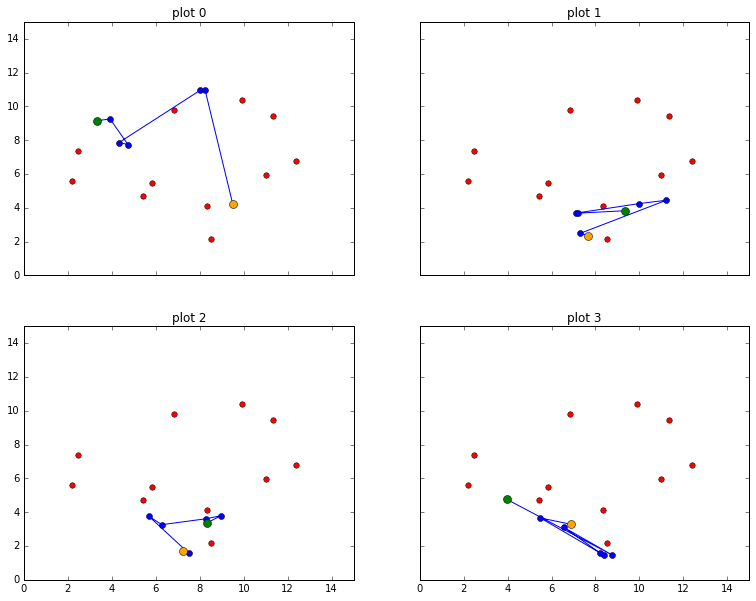

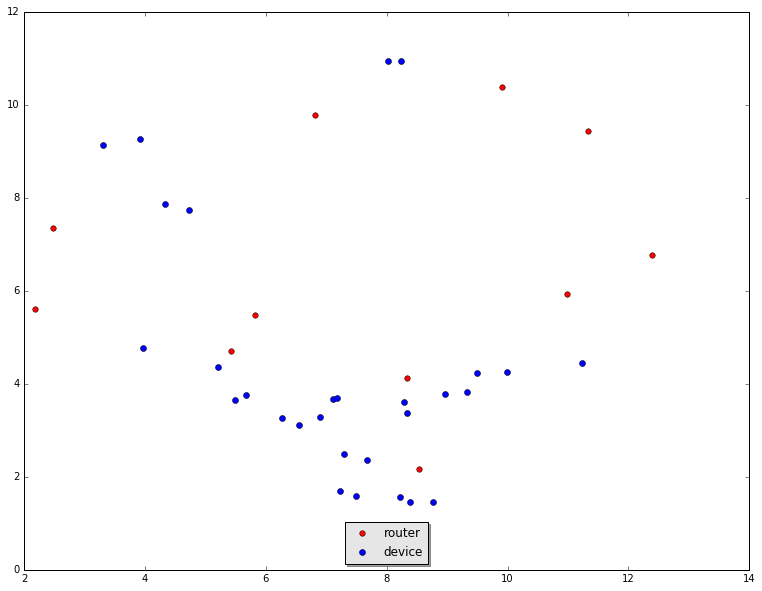

In [279]:
# sanity check: I'm plotting devices and routers in separate plots to understand if movement make sense
max_rows =2 
max_cols = 2
fig = plt.figure()
fig, axarray = plt.subplots(nrows=max_rows, ncols=max_cols, sharex=True, sharey=True)
m = len(optimal_params)
k = m/(max_rows*max_cols)
count = -1
for i in range(len(axarray)):
    for j, ax in enumerate(axarray[i]):
        count +=1
        i = 0
        for router, position in routers_p.items():
            ax.plot(position[0],position[1],'or', markersize=5.5,label="router" if i == 0 else "")
            i+=1 
        ax.plot(optimal_params[k*count:k*(count+1),0],optimal_params[k*count:k*(count+1),1], '-o', label='device')
        ax.plot(optimal_params[k*count,0],optimal_params[k*count,1], '-o', markersize=8, color="green")
        ax.plot(optimal_params[k*(count+1)-1,0],optimal_params[k*(count+1)-1,1], '-o', markersize=8, color="orange")
        ax.set_title("plot "+ str(count))
        # el.set_alpha(0.5)
        ax.set_xlim(0, 15)
        ax.set_ylim(0, 15)
plt.show() 


fig, ax = plt.subplots()
i = 0 
for router, position in routers_p.items():
    plt.plot(position[0],position[1],'or', markersize=5.5,label='router' if i==0 else "")
    i+=1 
plt.plot(optimal_params[:,0],optimal_params[:,1], 'o', label='device')
# Now add the legend with some customizations.
legend = ax.legend(loc='lower center', shadow=True, numpoints=1)
# The frame is matplotlib.patches.Rectangle instance surrounding the legend.
frame = legend.get_frame()
frame.set_facecolor('0.90')


In the plots red dots are routers, blue dots are the device, green - start of movement, orange - end of movement. 
We observe that in general movement make sense, although some jumps are present. We suspect that the provided data contains only a partial set of the full data, and is the main cause.

Plot of the different transmission powers


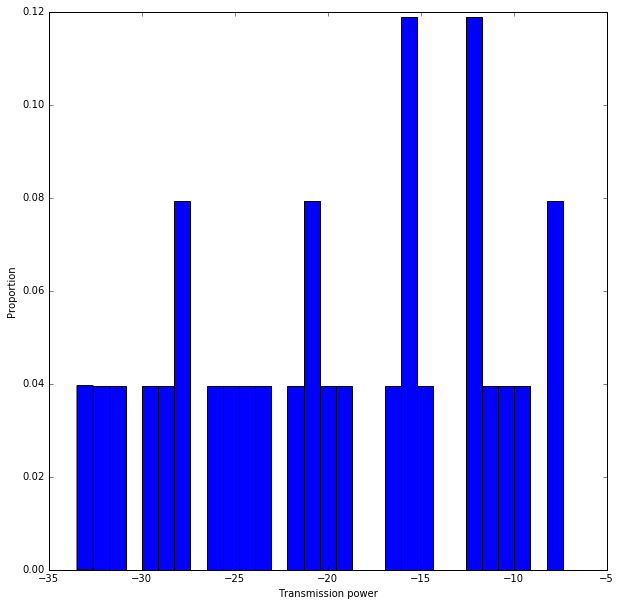

In [100]:
# another sanity check
print 'Plot of the different transmission powers'
# create a plot for the transmission powers
n, bins, _= plt.hist(np.array(optimal_params[:,2]), 30, normed=True)
plt.xlabel('Transmission power')
plt.ylabel('Proportion')
plt.show()

In [ ]:
# and another one
print 'Histogram of chi2 values'

# create a plot for the transmission powers
n, bins, _= plt.hist(np.array(optimal_params[:,3]), 50, normed=True)

rv = chi2.pdf(bins,5 )
plt.xlabel('chi squared')
plt.ylabel('Proportion')
plt.plot( bins, rv,  'r--')
plt.show()

## c) 

In order to estimate uncertainties, we will need to re-derivative our B matrix, as now we have 3 parameters that $\chi^2$ takes. 

$$ P_r^i(x,y, P_t) \approx P_r^i (x_0, y_0, P_{t0}) + \alpha_i \Delta x + \beta_i \Delta y + \gamma_i \Delta P_t$$
where we added $\gamma_i = \frac{d P(x,y,P_t)}{d P_t}$, and $\Delta P_t = (P_t - P_{t0})$

Now our goal would be to use that formula in $\chi^2$ approximation in order to abtain a new matrix B that is related to coordinate uncertainties. 

$$ \chi^2 = \sum_{i=1} \frac{S_i^2}{\sigma_i^2} - 2 \sum_{i=1} \frac{S_i P_r^i(x,y,P_t)}{\sigma^2} + \sum_{i=1} \frac{P_r^i(x,y,P_t)^2}{\sigma_i^2} 
\approx \sum_{i=1} \frac{S_i^2}{\sigma_i^2} - 2 \sum_{i=1} - 2 \sum_{i=1} \frac{S_i(P_r^i(x_0,y_0,P_{t0}) + \alpha_i \Delta x + \beta_i \Delta y + \gamma_i \Delta P_t) }{\sigma_i^2} + \sum_{i=1} \frac{(P_r^i(x_0,y_0,P_{t0}) + \alpha_i\Delta x + \beta_i \Delta y)^2}{\sigma_i^2} + \sum_{i=1} \frac{2 (\alpha_i \Delta x +\beta_i \Delta y) \gamma_i \Delta P_t + (\gamma_i \Delta P_t )^2}{\sigma_i^2} = 
(\sum_{i=1} \frac{S_i^2}{\sigma_i^2} - 2 \sum_{i=1} \frac{S_i(P_r^i(x_0,y_0,P_{t0}) + \alpha_i \Delta x + \beta_i \Delta y)}{\sigma_i^2} + \sum_{i=1} \frac{(P_r^i(x_0,y_0,P_{t0}) + \alpha_i \Delta x + \beta_i \Delta y)^2}{\sigma_i^2}) + ( - 2 \sum_{i=1} \frac{S_i \gamma_i \Delta P_t}{\sigma_i^2} + \sum_{i=1} \frac{2(\alpha_i \Delta x + \beta_i \Delta y)\gamma_i \Delta P_t + (\gamma_i \Delta P_t)^2+ 2 P_r^i(x_0,y_0,P_{t0}) \gamma_i \Delta P_t}{\sigma_i^2})
$$

Upon careful inspection, we see that the first term(notice paranthesis) in the last equation is exactly what we had in the first $\chi^2$ approximation, and we know a more compact solution for it. The only thing we need to take care of is the second term. We also use the fact that $\gamma_i = 1$ for all i. 


$$ -2 \sum_{i=1} \frac{S_i \gamma_i \Delta P_t}{\sigma_i^2} + \sum_{i=1} \frac{2(\alpha_i \Delta x + \beta_i \Delta y)\gamma_i \Delta P_t + (\gamma_i \Delta P_t)^2+ 2 P_r^i(x_0,y_0,P_{t0}) \gamma_i \Delta P_t}{\sigma_i^2} = 
2 \sum_{i=1} \frac{ (P_r^i(x_0,y_0,P_{t0}) - S_i) \Delta P_t}{\sigma_i^2} + \sum_{i=1} \frac{2 (\alpha_i \Delta x + \beta_i \Delta y) \Delta P_t + \Delta P_t^2}{\sigma_i^2}
$$

The first term in the second equation is the one we observe in setting partial of $\chi^2 $ to zero, i.e. $\frac{d \chi^2}{d P_t} = 2 \sum_{i=1} \frac{S_i - P_r^i(x_0,y_0,P_{t0})}{\sigma_i^2} \frac{d P_r^i(x_0,y_0,P_{t0})}{ d P_t} = 0$. And thus we are left with only the second term. Therefore, our final solution takes the following form:

$$ \chi^2  \approx \sum_{i=1} \frac{(S_i - P_r^i(x_0,y_0,P_{t0}))^2}{\sigma_i^2} + \sum_{i=1} \frac{(\alpha_i \Delta x)^2 + 2 \alpha_i \beta_i \Delta x \Delta y + (\beta_i \Delta y)^2 + 2 \alpha_i \Delta x \Delta P_t + 2 \beta_i \Delta y \Delta P_t + \Delta P_t^2 }{\sigma_i^2}$$

which in vectorized form takes a form of :
$$ A + [\Delta x\; \Delta y\; \Delta P_t]^T \hat B [\Delta x\; \Delta y\; \Delta P_t]$$

where $$ \hat B = 
\begin{bmatrix}
\sum_{i=1} \frac{\alpha_i^2}{\sigma_i^2} & \sum_{i=1} \frac{\alpha_i \beta_i}{\sigma_i^2} & \sum_{i=1} \frac{\alpha_i \gamma_i}{\sigma_i^2} \\
\sum_{i=1} \frac{\alpha_i \beta_i}{ \sigma_i^2} & \sum_{i=1} \frac{\beta_i^2}{\sigma_i^2} & \sum_{i=1} \frac{\gamma_i \beta_i}{\sigma_i^2} \\
\sum_{i=1} \frac{\alpha_i \gamma_i}{ \sigma_i^2} & \sum_{i=1} \frac{\gamma_i \beta_i}{\sigma_i^2} & \sum_{i=1} \frac{\gamma_i^2}{\sigma_i^2}
\end{bmatrix}
$$

And using our calculus based solution for finding maximum $\Delta x, \Delta y$, our critical points take the form : 
    $$c = +- \frac{\hat B^{-1} \alpha} {\sqrt{\alpha^T \hat B^{-1} \alpha} }$$

where $\alpha$ is one hot vector, where one corresponds to the parameter of interest. And as previously, using the fact that the matrix is positive definite, we can extract maximum deltas from diagonal of the inverse. 

In [106]:
# computing uncertainities for every device positions 
def compute_variance(wifi_data, sigmas):
    x_vars = []
    y_vars = []
    for i, packet_group in enumerate(wifi_data):
        packet_group = np.array(packet_group)
        x_0 = optimal_params[i][0]
        y_0 = optimal_params[i][1]
        # uncertainty
        estim_device_p = np.array([x_0, y_0, device_h])
        r_p = packet_group[:,0:3]
        sigmas = np.ones((len(packet_group),1))*sigma_factor
        estim_radiuses = compute_radiuses (r_p - estim_device_p)
        B_hat = compute_B_hat(x_0, y_0, r_p, estim_radiuses**2, sigmas)
        B_hat_inv = np.linalg.inv(B_hat)
        x_vars+=[B_hat_inv[0,0]]
        y_vars+=[B_hat_inv[1,1]]
    return x_vars, y_vars

In [116]:
sigmas = np.ones((len(r_p),1)) * sigma_factor
x_vars, y_vars = compute_variance(wifi_data, sigmas)

## d)

In [108]:
def plot_var_and_position(routers_p, optimal_params, x_vars, y_vars):
    fig, ax = plt.subplots()
    i = 0 
    for router, position in routers_p.items():
        plt.plot(position[0], position[1],'or', markersize=5.5, label="router" if i == 0 else "")
        i+=1
    for o_p in zip(optimal_params[:,0], optimal_params[:,1],x_vars,y_vars):
        x = o_p[0]
        y = o_p[1]
        x_sd = o_p[2]**0.5
        y_sd = o_p[3]**0.5
        el = Ellipse(xy=[x, y], width=x_sd, height=y_sd, color="yellow")
        el.set_facecolor("black")
        el.set_alpha(0.1)
        ax.add_artist(el)
    plt.plot(optimal_params[:,0],optimal_params[:,1],'-o', markersize=3.5, color="blue", label="device" )
        
    # Now add the legend with some customizations.
    legend = ax.legend(loc='lower center', shadow=True, numpoints=1)
    # The frame is matplotlib.patches.Rectangle instance surrounding the legend.
    frame = legend.get_frame()
    frame.set_facecolor('0.90')

    # Set the fontsize
    for label in legend.get_texts():
        label.set_fontsize('small')

    for label in legend.get_lines():
        label.set_linewidth(1.5)  # the legend line width
        
    ax.set_xlim(-2,15)
    ax.set_ylim(-2, 15)
    plt.show()

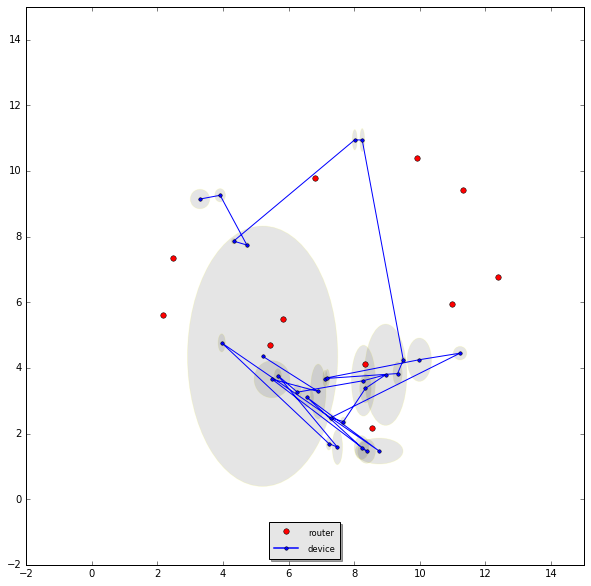

In [109]:
# plotting
plot_var_and_position(routers_p, optimal_params, x_vars, y_vars)

We observe that some device positions have very high uncertainty, and some have very small. We suspect that this happens due to noise, which is not estimated properly. In our case we assumed that the noise is constant for all routers, but in reality it's likely to be a wage assumption. In general, one could perform a linesearch over a space of noise combinations for routers in order to detect the preper set. But this procedure is rather expensive time-wise, and for the homework has been omitted. 

## e)

In [110]:
# computing systems resolution
x_res = optimal_params[:,0].mean()
y_res = optimal_params[:,1].mean()
print 'system\'s resolution is (%f , %f)' % (x_res, y_res)

system's resolution is (7.157583 , 4.469138)


## f) 


In [111]:
print 'average transimition power is %f' % optimal_params[:,2].mean()

average transimition power is -19.751397


##g) 

In [112]:
import copy
def merge_groups(wifi_data):
    
    # merge points based on the radius threshold, the comparison method is one-vs-all
    th = 2000

    c_wifi_data = copy.deepcopy(np.array(wifi_data))
    # extract means 
    group_means = []
    for packet_group in c_wifi_data:
        packet_group = np.array(packet_group)
        group_means.append(packet_group[0,4]) # I take first one because they are all the same 
    group_means = np.array(group_means)
    # merge groups tha happen to have small mean time-difference 
    new_wifi_data = []
    while True:
        if len(group_means) == 0: break
        mean = group_means[0] # grab the first one 
        diff = abs(group_means - mean)
        ind = np.where(diff <= th)[0]
        groups_to_merge = c_wifi_data[ind]
        temp_group = []
        for group in groups_to_merge:
            for item in group:
                temp_group.append(item)
        new_wifi_data.append(np.array(temp_group))
        # remove merged elements from the "stack"
        c_wifi_data = np.delete(c_wifi_data, ind, axis=0)
        group_means = np.delete(group_means, ind)  
    return new_wifi_data

In [113]:
new_wifi_data = merge_groups(wifi_data)
print "now the number of groups is : %d" %len(new_wifi_data)

now the number of groups is : 11


Instead of modifying $\chi^2$ directly we modify the input data to the $\chi^2$, which is the same as modifying the sum in the formula. We perform a merge operation of our groups based on their timestamp means. I.e. we inspect groups and compare their timestamp means, if timestamp mean difference is higher then a threshold (e.g. 2000 milliseconds), we merge those groups together. Before this merge we had 29 groups, and after (with 2 seconds threshold) we got only 11. 

In [114]:
# Now optimize using new data
new_optimal_params = optimize_with_restarts(new_wifi_data, sigma_factor, max_tries = 300)

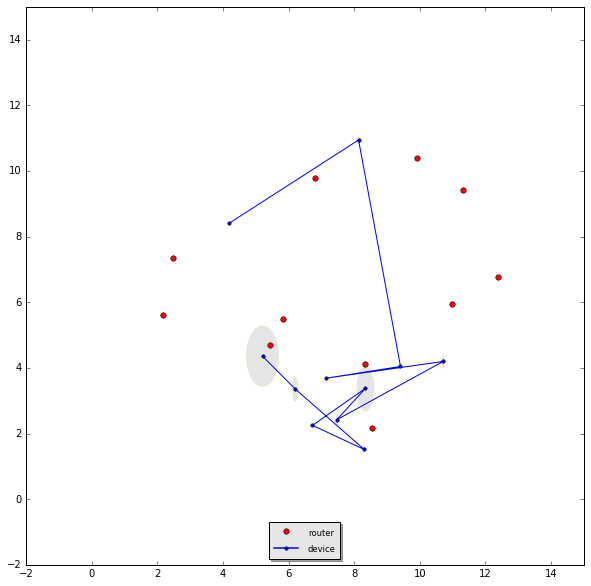

In [115]:
sigmas = np.ones((len(r_p),1)) * sigma_factor
new_x_vars, new_y_vars = compute_variance(new_wifi_data, sigmas)
plot_var_and_position(routers_p, new_optimal_params, new_x_vars, new_y_vars)

As we observe, once the groups( same packets sent to routers) where merged based on their timestamps, the uncertainty decreased significantly. In addition, the chaotic jumps also decreased, and the movement became more smooth. 